# Analysis of Film Statistics Compared to Movie Runtime

In [1]:
# Load libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data.
film_df = pd.read_csv("./Resources/film_df.csv")

## Runtime vs. Review Sentiment
There was a conjecture in our group that runtime may be correlated to reaction, e.g. maybe longer movies annoyed movie goers.  So lets first plot runtime against median normalized review sentiment.

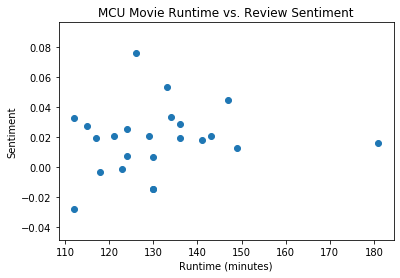

In [3]:
plt.scatter(film_df.runtime, film_df.normal_median)
plt.title('MCU Movie Runtime vs. Review Sentiment')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Sentiment')
plt.show()

Not much there.  The scatter plot is mostly a cloud.  Some long movies were well recieved, and some short ones were.  And the longest film, "Avengers: Endgame" at 180 minutes, seems right in the middle of the sentiments expressed.

Let's see which features _were_ correlated with runtime.

In [4]:
film_df.corr().runtime.sort_values(ascending = False).head(7)

runtime              1.000000
worldwide_gross      0.886919
budget               0.882610
imdb_rating          0.748443
themoviedb_rating    0.712479
normal_std           0.548671
normal_skew          0.478744
Name: runtime, dtype: float64

So that runtime is most correlated to worldwide gross and budget, but also somewhat correlated to ratings from both film database websites.  Let's see all the scatter plots of the top four features by correlation to runtime.

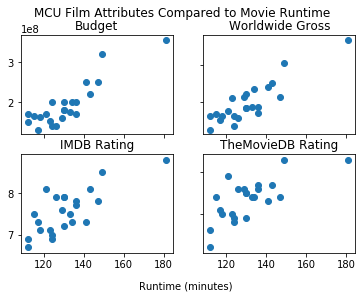

In [5]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('MCU Film Attributes Compared to Movie Runtime')
ax1.scatter(film_df.runtime, film_df.budget)
ax1.set_title("Budget")
ax2.scatter(film_df.runtime, film_df.worldwide_gross)
ax2.set_title("Worldwide Gross")
ax3.scatter(film_df.runtime, film_df.imdb_rating)
ax3.set_title("IMDB Rating")
ax4.scatter(film_df.runtime, film_df.themoviedb_rating)
ax4.set_title("TheMovieDB Rating")
fig.text(.4, 0, "Runtime (minutes)")
for ax in fig.get_axes():
    ax.label_outer()

--------------------------------

# Limitations

In [6]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/o3bhQwY0KCY?start=53" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

There are some limitations of the project's methodologies.

* The NLP model is fairly simplistic, and will miss an amount of intended content of any language it evaluates. E.g., it may miss sarcasm.
* While the moviedb API proved simple and straightforward to use, the films we analysed often did not get reviewed very many times.  The number of reviews the movies got ranged from 2 to 20, so that may not be the best representative of overall sentiment toward any film in particular or the franchise overall.
* While the set of reviews was collected by code, much of the other metadata about each film was collected by hand -- this would not scale well.